In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def npm_convolve(f, a, g, b, width):
    """
    На вход подаются значения функции f_i и g_i на интервале [x_i, x_{i+1}).
    Сетка равномерная с широной width
    Свертка:
    (f*g)(x_i) = widht * [f(x_0)g(x_i - x_0) + f(x_1)g(x_i - x_1) + ... ]
    (f*g)(x_i) = widht * [f[0]g[i - 0] + f[1]g[x_i - x_1] + ... + f[j]g[i - j] + ...]
    """
    m = math.trunc(a / width)
    k = math.trunc(b / width)
    s_f = f.size
    s_g = g.size
    f_indx = np.arange(s_f, dtype="i")
    points = np.array(range(m+k, m+k+s_f+s_g))*width
    result = np.zeros(points.size, "d")
    g_cycle = np.zeros(points.size, "d")
    g_cycle[:s_g] = g
    indx = np.zeros(s_f, dtype= "i")
    for i in range(points.size):
        indx[:] = i - f_indx
        result[i] = width*np.dot(f, g_cycle[indx])
    return points, result


In [3]:
from scipy.signal import square

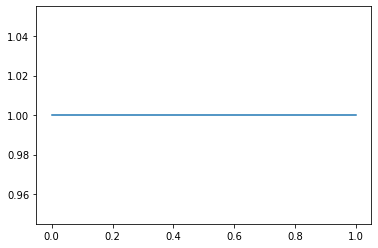

In [4]:
x_g = np.linspace(0,1, 50)
g = square(x_g, duty=1)
plt.plot(x_g, g)

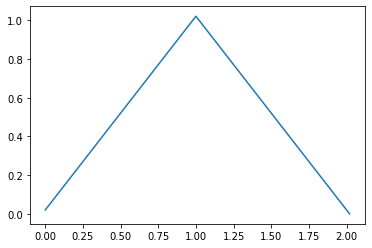

In [5]:
width = x_g[1] - x_g[0]
conv = npm_convolve(g, 0, g, 0, width)
plt.plot(*conv)

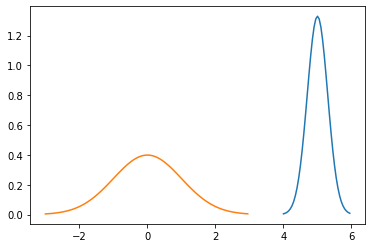

In [6]:
from scipy.stats import norm

width = 0.05
x_g = np.arange(-3, 3, width)
x_f = np.arange(4,6, width)
g = norm.pdf(x_g, loc=0 ,scale = 1)
f = norm.pdf(x_f, loc=5 ,scale = 0.3)
plt.plot(x_f, f)
plt.plot(x_g, g)

In [13]:
%%timeit
conv = npm_convolve(f, x_f[0], g, x_g[0], width)

892 µs ± 13.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


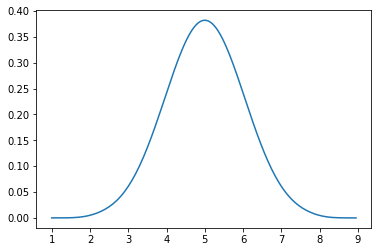

In [14]:
plt.plot(*conv)